In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

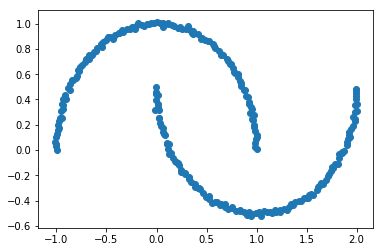

In [30]:
X,y = make_moons(250,random_state=19,noise=0.01)
plt.scatter(X[:,0],X[:,1])

In [31]:
k = 2
sigma = 0.2

In [32]:
def affinity_matrix():
    '''creating affinity matrix'''
    A_matrix = np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if i!=j:
                A_matrix[i,j] = np.exp(-sum((X[i]-X[j])**2)/(2*sigma**2))
    return A_matrix        


In [33]:
def diagonal_inv():
    ''' creating diagonal inverse'''
    D_inv_matrix = np.zeros((X.shape[0],X.shape[0]))           
    for i in range(X.shape[0]):
        D_inv_matrix[i,i] = sum(A[i,:])**(-0.5)
    return D_inv_matrix

In [34]:
A = affinity_matrix()
D_inv = diagonal_inv()

L = (D_inv.dot(A)).dot(D_inv)   

###finding eigenvectors of L
eigvals,eigvecs = np.linalg.eig(L)

###finding k largest eigenvectors of L
E = eigvecs[:,:k]


In [35]:
###final transformed dataset
Y = np.zeros(E.shape)
for i in range(E.shape[0]):
    Y[i] = E[i]/(sum(E[i]**2)**0.5)    

In [36]:
### using kmeans on transformed dataset
km = KMeans(n_clusters = k)
clust = km.fit_predict(Y)

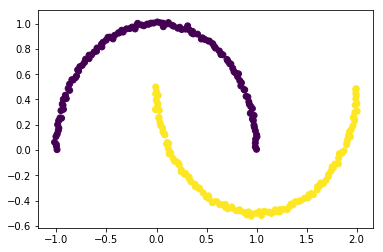

In [37]:
plt.scatter(X[:,0],X[:,1],c=clust)


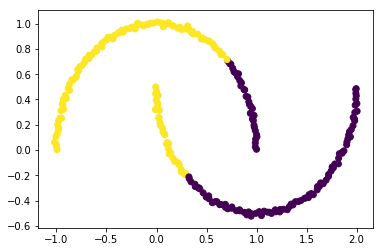

In [38]:
### using Kmeans on the original dataset
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=clusters)